In [1]:
using LinearAlgebra
using Distributions
using Optim
using Random
using StatsFuns
using JuMP
using MosekTools
using JLD2

include("ETO.jl")
include("RO.jl")
include("Data.jl")
include("Estimate.jl")
include("Performance.jl")
include("Plot_Figures.jl")
include("Data_Generation.jl")
include("Implement_ETO.jl")
include("Implement_RO.jl")

Run_RO_with_RO_coef (generic function with 1 method)

In [2]:
current_dir = pwd()
parent_dir = dirname(current_dir)
grand_pa_dir = dirname(parent_dir)
data_dir = string(grand_pa_dir, "/Data/")
if !isdir(data_dir)
    mkpath(data_dir)
end

## Functions

In [3]:
function set_Params(N, N_u, K, S_train, S_test, offdiag_sign, max_offdiag, P_bar, RO_coef_all, seed)
    Params = Dict()
    Params["N"] = N
    Params["N_u"] = N_u
    Params["K"] = K
    Params["S_train"] = S_train
    Params["S_test"] = S_test
    Params["offdiag_sign"] = offdiag_sign
    Params["max_offdiag"] = max_offdiag
    Params["P_bar"] = P_bar
    Params["RO_coef_all"] = RO_coef_all
    Params["seed"] = seed
    return Params
end

set_Params (generic function with 1 method)

## Evaluate

#### Baseline Parameters

In [ ]:
project_name = "Assortment_Pricing_Simulated_Data/"
seed = 1;
N = 5;
N_u = 1;
K = 20;
S_test = 1000;
P_bar = 5.0;
iterations = 10;
RO_coef_all = [0.0];
# RO_coef_all = [0.0,0.01,0.05,0.1,0.12,0.15,0.2,0.25,0.3];

### offdiag is mix

In [5]:
S_train = 500;
offdiag_sign = "mix";
max_offdiag = 1.0;
Params = set_Params(N, N_u, K, S_train, S_test, offdiag_sign, max_offdiag, P_bar, RO_coef_all, seed);

In [6]:
sub_file_name = "N=$(N)_N_u=$(N_u)_K=$(K)_S_train=$(S_train)_offdiag_sign=$(offdiag_sign)_max_offdiag=$(max_offdiag)/"
this_data_file = string(data_dir,project_name,sub_file_name)
if !isdir(this_data_file)
    mkpath(this_data_file)
end
save(string(this_data_file, "Params.jld2"), Params);

- Generate Data

In [7]:
Random.seed!(seed)
Input_Data = generate_Input_Data(S_train,S_test,iterations, N, N_u, K, offdiag_sign,max_offdiag,P_bar);
Input_Data = Calculate_Hyper_Param(RO_coef_all, iterations, N, N_u, K, Input_Data);
save(string(this_data_file, "Input_Data.jld2"), Input_Data);

- Run Oracle

In [8]:
print_flag=true
RST_Oracle = Run_Oracle(iterations, N, N_u, K, Input_Data,print_flag);
Rev_Oracle = [RST_Oracle["iter=$(iter)_Rev"] for iter in 1:iterations];
save(string(this_data_file, "RST_Oracle.jld2"), RST_Oracle);

iter=1: rev_Oracle = 0.790683, price_Oracle = [1.17, 4.23, 0.05]
iter=2: rev_Oracle = 2.725176, price_Oracle = [4.89, 3.41, 4.64]
iter=3: rev_Oracle = 1.098914, price_Oracle = [1.52, 0.2, 4.77]
iter=4: rev_Oracle = 1.20003, price_Oracle = [4.96, 0.05, 1.73]
iter=5: rev_Oracle = 2.729807, price_Oracle = [4.95, 4.84, 3.24]
iter=6: rev_Oracle = 2.603085, price_Oracle = [4.51, 3.52, 4.67]
iter=7: rev_Oracle = 1.866536, price_Oracle = [2.74, 4.88, 4.4]
iter=8: rev_Oracle = 1.389423, price_Oracle = [4.5, 1.35, 1.92]
iter=9: rev_Oracle = 1.584309, price_Oracle = [4.52, 2.39, 4.67]
iter=10: rev_Oracle = 0.893345, price_Oracle = [0.07, 1.69, 4.01]
iter=11: rev_Oracle = 2.593127, price_Oracle = [4.76, 3.48, 4.61]
iter=12: rev_Oracle = 2.285364, price_Oracle = [4.69, 4.82, 2.84]
iter=13: rev_Oracle = 1.901213, price_Oracle = [2.82, 4.91, 4.97]
iter=14: rev_Oracle = 1.394103, price_Oracle = [1.79, 1.94, 4.84]
iter=15: rev_Oracle = 1.251731, price_Oracle = [2.37, 4.84, 0.69]
iter=16: rev_Oracle = 2

- Run ETO

In [9]:
RST_ETO = Run_ETO(iterations, N, N_u, K, Input_Data,print_flag);
Rev_ETO = [RST_ETO["iter=$(iter)_Rev"] for iter in 1:iterations]
println("Rev_ETO/Rev_Oracle = ",round.(Rev_ETO./Rev_Oracle,digits=4))
save(string(this_data_file, "RST_ETO.jld2"), RST_ETO);

iter=1: rev_ETO = 0.39373, price_ETO = [2.21, 4.23, 0.05]
iter=2: rev_ETO = 1.768533, price_ETO = [4.89, 5.0, 3.97]
iter=3: rev_ETO = 0.502072, price_ETO = [3.91, 0.2, 1.51]
iter=4: rev_ETO = 1.078286, price_ETO = [2.07, 4.72, 0.45]
iter=5: rev_ETO = 2.651236, price_ETO = [4.95, 4.84, 2.86]
iter=6: rev_ETO = 2.57053, price_ETO = [4.51, 3.15, 4.67]
iter=7: rev_ETO = 1.302366, price_ETO = [1.82, 4.88, 0.09]
iter=8: rev_ETO = 0.903166, price_ETO = [4.5, 4.66, 2.15]
iter=9: rev_ETO = 1.547387, price_ETO = [4.52, 1.97, 4.67]
iter=10: rev_ETO = 0.432582, price_ETO = [2.04, 4.91, 0.19]
iter=11: rev_ETO = 2.396608, price_ETO = [4.76, 3.12, 2.95]
iter=12: rev_ETO = 1.445733, price_ETO = [2.48, 4.82, 2.78]
iter=13: rev_ETO = 1.696135, price_ETO = [4.92, 0.04, 2.62]
iter=14: rev_ETO = 1.394103, price_ETO = [1.79, 1.94, 4.84]
iter=15: rev_ETO = 1.251731, price_ETO = [2.37, 4.84, 0.69]
iter=16: rev_ETO = 2.124862, price_ETO = [2.62, 4.95, 3.79]
iter=17: rev_ETO = 1.313104, price_ETO = [0.92, 1.53, 

- Run RO under different uncertainty set

In [10]:
model_name="Two_Side"
RST_RO = Dict(); Rev_RO = Dict();
for RO_coef in RO_coef_all
    println("Running RO with RO_coef = ",RO_coef)
    RST_RO_this = Run_RO_with_RO_coef(RO_coef, iterations, N, N_u, K, Input_Data, 0.0,model_name,false);
    RST_RO["RO_coef=$(RO_coef)"] = RST_RO_this
    Rev_RO["RO_coef=$(RO_coef)"] = [RST_RO_this["iter=$(iter)_Rev"] for iter in 1:iterations]
end
save(string(this_data_file, "RST_RO.jld2"), RST_RO);

Running RO with RO_coef = 0.0
Running RO with RO_coef = 0.01
Running RO with RO_coef = 0.05
Running RO with RO_coef = 0.1
Running RO with RO_coef = 0.12
Running RO with RO_coef = 0.15
Running RO with RO_coef = 0.2
Running RO with RO_coef = 0.25
Running RO with RO_coef = 0.3


In [11]:
Rev_Oracle = [RST_Oracle["iter=$(iter)_Rev"] for iter in 1:iterations];
Rev_ETO = [RST_ETO["iter=$(iter)_Rev"] for iter in 1:iterations];
Rev_RO = Dict();
for RO_coef in RO_coef_all
    RST_RO_this = RST_RO["RO_coef=$(RO_coef)"]
    Rev_RO["RO_coef=$(RO_coef)"] = [RST_RO_this["iter=$(iter)_Rev"] for iter in 1:iterations];
end

println("Mean Rev_Oracle: ", mean(Rev_Oracle));
println("Mean Rev_ETO: ", mean(Rev_ETO));
Rev_RO_Avg = [mean(Rev_RO["RO_coef=$(RO_coef)"]) for RO_coef in RO_coef_all];
println("Mean Rev_RO: ", Rev_RO_Avg);

Mean Rev_Oracle: 1.6607186005794616
Mean Rev_ETO: 1.3303942302787697
Mean Rev_RO: [1.3303942302787697, 1.327213788702415, 1.3016022422883622, 1.298965997604373, 1.2828068693637018, 1.2548734690034564, 1.1967904941404894, 1.133722971546619, 1.0789029933500953]


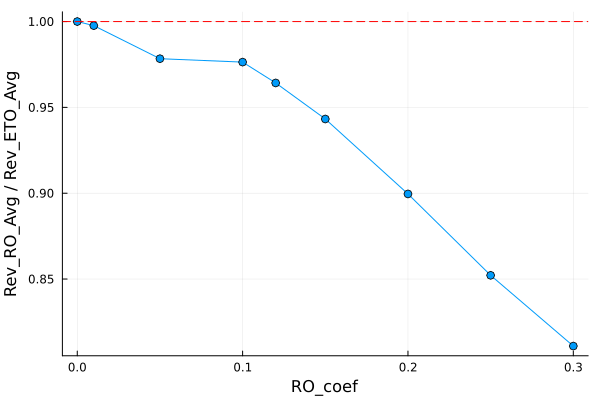

In [12]:
ratio = Rev_RO_Avg ./ mean(Rev_ETO)
plot(RO_coef_all, ratio, marker=:o, xlabel="RO_coef", ylabel="Rev_RO_Avg / Rev_ETO_Avg", legend=false)
hline!([1.0], linestyle=:dash, color=:red, label="y=1.0")
# savefig(plt, "Rev_RO_Avg_vs_Rev_ETO_Avg.png")  # 保存为当前目录下的PNG图片

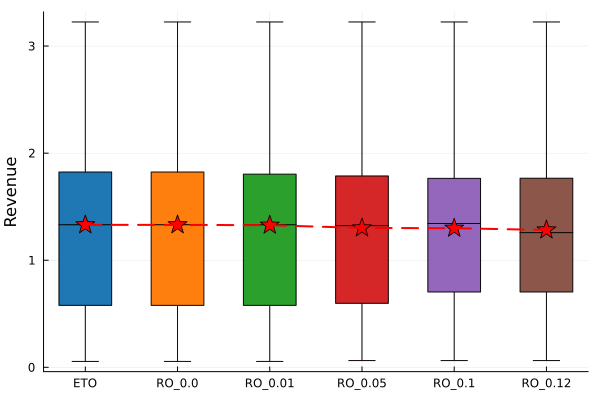

In [13]:
plot_boxplot(RO_coef_all[1:5],Rev_ETO,Rev_RO)

### offdiag is positive

In [14]:
# offdiag_sign = "positive";
# Params = set_Params(N, N_u, K, S_train, S_test, offdiag_sign, max_offdiag, P_bar, RO_coef_all, seed)

In [15]:
# sub_file_name = "N=$(N)_N_u=$(N_u)_K=$(K)_S_train=$(S_train)_offdiag_sign=$(offdiag_sign)_max_offdiag=$(max_offdiag)/"
# this_data_file = string(data_dir,project_name,sub_file_name)
# if !isdir(this_data_file)
#     mkpath(this_data_file)
# end
# save(string(this_data_file, "Params.jld2"), Params);

In [16]:
# Random.seed!(seed)
# Input_Data = generate_Input_Data(S_train,S_test,iterations, N, N_u, K, offdiag_sign,max_offdiag,P_bar);
# Input_Data = Calculate_Hyper_Param(RO_coef_all, iterations, N, N_u, K, Input_Data);
# save(string(this_data_file, "Input_Data.jld2"), Input_Data);

In [17]:
# print_flag=true
# RST_Oracle = Run_Oracle(iterations, N, N_u, K, Input_Data,print_flag);
# Rev_Oracle = [RST_Oracle["iter=$(iter)_Rev"] for iter in 1:iterations];
# save(string(this_data_file, "RST_Oracle.jld2"), RST_Oracle);

In [18]:
# RST_ETO = Run_ETO(iterations, N, N_u, K, Input_Data,print_flag);
# Rev_ETO = [RST_ETO["iter=$(iter)_Rev"] for iter in 1:iterations]
# println("Rev_ETO/Rev_Oracle = ",round.(Rev_ETO./Rev_Oracle,digits=4))
# save(string(this_data_file, "RST_ETO.jld2"), RST_ETO);

In [19]:
# model_name="Two_Side"
# RST_RO = Dict(); Rev_RO = Dict();
# for RO_coef in RO_coef_all
#     println("Running RO with RO_coef = ",RO_coef)
#     RST_RO_this = Run_RO_with_RO_coef(RO_coef, iterations, N, N_u, K, Input_Data, 0.0,model_name,false);
#     RST_RO["RO_coef=$(RO_coef)"] = RST_RO_this
#     Rev_RO["RO_coef=$(RO_coef)"] = [RST_RO_this["iter=$(iter)_Rev"] for iter in 1:iterations]
# end
# save(string(this_data_file, "RST_RO.jld2"), RST_RO);

In [20]:
# for RO_coef in RO_coef_all
#     Rev_RO_this = Rev_RO["RO_coef=$(RO_coef)"]
#     println("Average = ",round(mean(Rev_RO_this./Rev_ETO),digits=4),", Rev_RO/Rev_ETO for RO_coef=$(RO_coef) = ",round.(Rev_RO_this./Rev_ETO,digits=4),)
# end

### offdiag is negative

In [21]:
# offdiag_sign = "negative";
# Params = set_Params(N, N_u, K, S_train, S_test, offdiag_sign, max_offdiag, P_bar, RO_coef_all, seed)

In [22]:
# sub_file_name = "N=$(N)_N_u=$(N_u)_K=$(K)_S_train=$(S_train)_offdiag_sign=$(offdiag_sign)_max_offdiag=$(max_offdiag)/"
# this_data_file = string(data_dir,project_name,sub_file_name)
# if !isdir(this_data_file)
#     mkpath(this_data_file)
# end
# save(string(this_data_file, "Params.jld2"), Params);

In [23]:
# print_flag=true
# RST_Oracle = Run_Oracle(iterations, N, N_u, K, Input_Data,print_flag);
# Rev_Oracle = [RST_Oracle["iter=$(iter)_Rev"] for iter in 1:iterations];
# save(string(this_data_file, "RST_Oracle.jld2"), RST_Oracle);

In [24]:
# RST_ETO = Run_ETO(iterations, N, N_u, K, Input_Data,print_flag);
# Rev_ETO = [RST_ETO["iter=$(iter)_Rev"] for iter in 1:iterations]
# println("Rev_ETO/Rev_Oracle = ",round.(Rev_ETO./Rev_Oracle,digits=4))
# save(string(this_data_file, "RST_ETO.jld2"), RST_ETO);

In [25]:
# model_name="Two_Side"
# RST_RO = Dict(); Rev_RO = Dict();
# for RO_coef in RO_coef_all
#     println("Running RO with RO_coef = ",RO_coef)
#     RST_RO_this = Run_RO_with_RO_coef(RO_coef, iterations, N, N_u, K, Input_Data, 0.0,model_name,false);
#     RST_RO["RO_coef=$(RO_coef)"] = RST_RO_this
#     Rev_RO["RO_coef=$(RO_coef)"] = [RST_RO_this["iter=$(iter)_Rev"] for iter in 1:iterations]
# end
# save(string(this_data_file, "RST_RO.jld2"), RST_RO);